In [1]:
import numpy as np
import pandas as pd
import utilsCM
import matplotlib.pyplot as plt

In [2]:
icomps = 16
Ypredict = 'Word2Sense'

datapath = '../../../data-16/'

In [3]:
keyword = 'ROIpred'
layer =  'conv_5'
ROI = {'ObjectROI','SceneROI'}

In [4]:
if Ypredict is 'Word2Vec':
    ### Load Word2Vec subset
    filename = 'ThingsWrd2Vec_subset.txt'
    filepath = '../../../data-10/'
    Wrd2Vec = pd.read_csv(filepath + filename,sep=',',index_col = 0)
    Y_embeddings = Wrd2Vec.values[:,:].astype(np.float)
elif Ypredict is 'Word2Sense':
    ### Load Word2Sense subset
    pathtofile = '../../../data-07/'
    Y_embeddings_csv = pd.read_csv(pathtofile + "ThingsWrd2Sns_subset.txt", sep=",",index_col = 0)
    Y_embeddings = Y_embeddings_csv.values[:,:].astype(np.float)

In [5]:
Y_embeddings_csv

,sense016,sense042,sense063,sense074,sense081,sense103,sense122,sense134,sense135,sense138,...,sense2059,sense2060,sense2115,sense2118,sense2145,sense2179,sense2185,sense2207,sense2209,sense2224
Word,,,,,,,,,,,,,,,,,,,,,
ambulance,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
ant,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.008376,0.000000,0.000000,0.004204,...,0.000000,0.000000,0.000000,0.000000,0.007755,0.0,0.004693,0.000000,0.0,0.000000
bag,0.00000,0.000000,0.012635,0.000000,0.0,0.000000,0.000000,0.008614,0.000000,0.000000,...,0.000000,0.002681,0.000000,0.011955,0.000000,0.0,0.000000,0.005584,0.0,0.012848
bandage,0.01183,0.000000,0.001187,0.008988,0.0,0.009341,0.001759,0.008362,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
bassoon,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002473,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weasel,0.00000,0.018314,0.000000,0.000000,0.0,0.000000,0.012747,0.000000,0.000000,0.007938,...,0.000000,0.000000,0.000000,0.000000,0.005697,0.0,0.000000,0.000000,0.0,0.000000
wedge,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.008438,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.006805
wine,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.002867,0.000000,...,0.006067,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [6]:
# #Only the subset
# WrdThingspath = '../../../data-04/'
# nsample = 12
# WrdThingsInfo = pd.read_csv(WrdThingspath + 'KeptTHINGSInfo_n' + str(nsample) +'.csv',sep=',',index_col = 0)


##reset the index
# Y_embeddings_csv = Y_embeddings_csv.set_index(WrdThingsInfo.Word)

In [7]:
import csv

##Showing histograms for senses above threshold
myDict = {}

filename_Object = 'Predict' + Ypredict + '_' + keyword + '_' + 'ObjectROI' + '_'+ layer + '_'+ str(icomps) +'PCs'
filename_Scene = 'Predict' + Ypredict + '_' + keyword + '_' + 'SceneROI' + '_'+ layer + '_'+ str(icomps) +'PCs'

thisPrediction_Ob = np.load(datapath + filename_Object + '.npy')
thisPrediction_Sc = np.load(datapath + filename_Scene + '.npy')

In [8]:
tresh_bonf = utilsCM.p2r(.05/Y_embeddings.shape[1], Y_embeddings.shape[0])
thisPrediction_Ob[thisPrediction_Ob<tresh_bonf] = 0
thisPrediction_Sc[thisPrediction_Sc<tresh_bonf] = 0

Text(0.5, 1.0, 'Object ROI Senses - Scene ROI Senses (sorted) ')

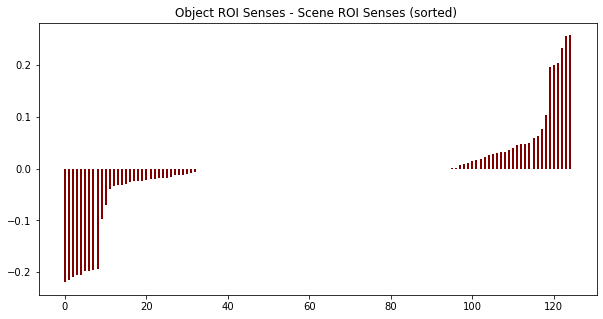

In [15]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
Diffsenses = thisPrediction_Ob - thisPrediction_Sc

plt.bar(range(0,len(Diffsenses)), np.sort(Diffsenses), color ='maroon',  
        width = 0.5) 
plt.title("Object ROI Senses - Scene ROI Senses (sorted) ") 

In [16]:
Diffsenses_Ob = Diffsenses>0.1
Diffsenses_Sc = Diffsenses< -0.1

In [17]:
#load the labels
WrdThingspath = '../../../data-04/'
nsample = 12
WrdThingsInfo = pd.read_csv(WrdThingspath + 'KeptTHINGSInfo_n' + str(nsample) +'.csv',sep=',',index_col = 0)


In [18]:
Y_embeddings_csv = Y_embeddings_csv.set_index(WrdThingsInfo.Word)

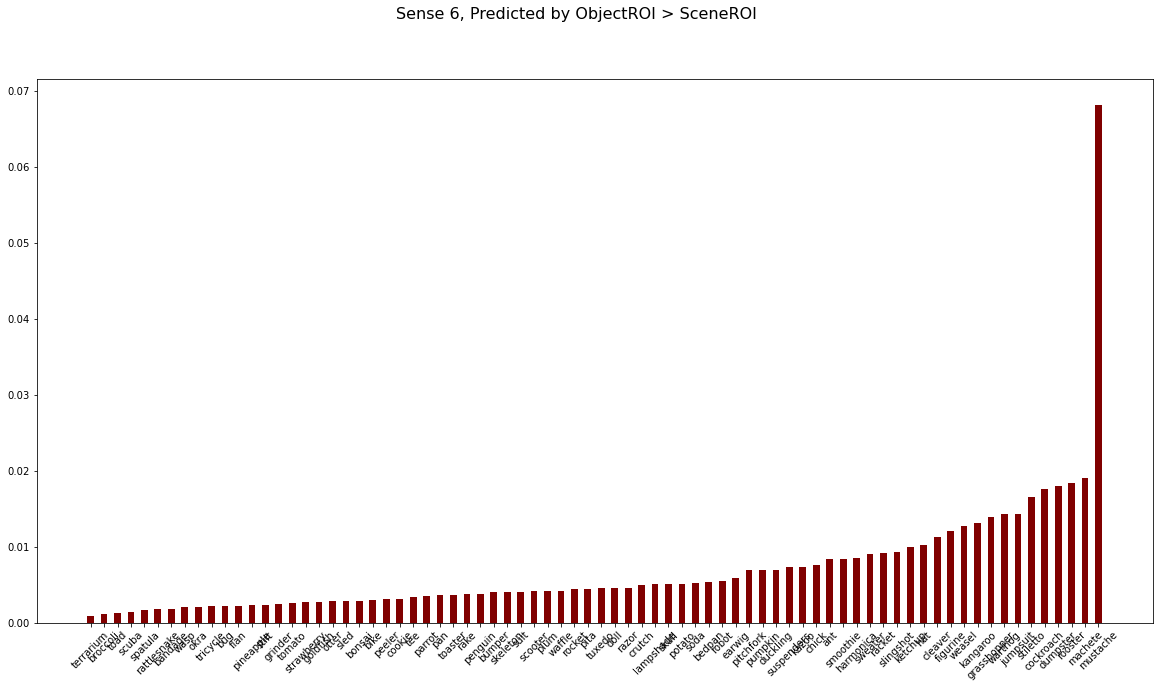

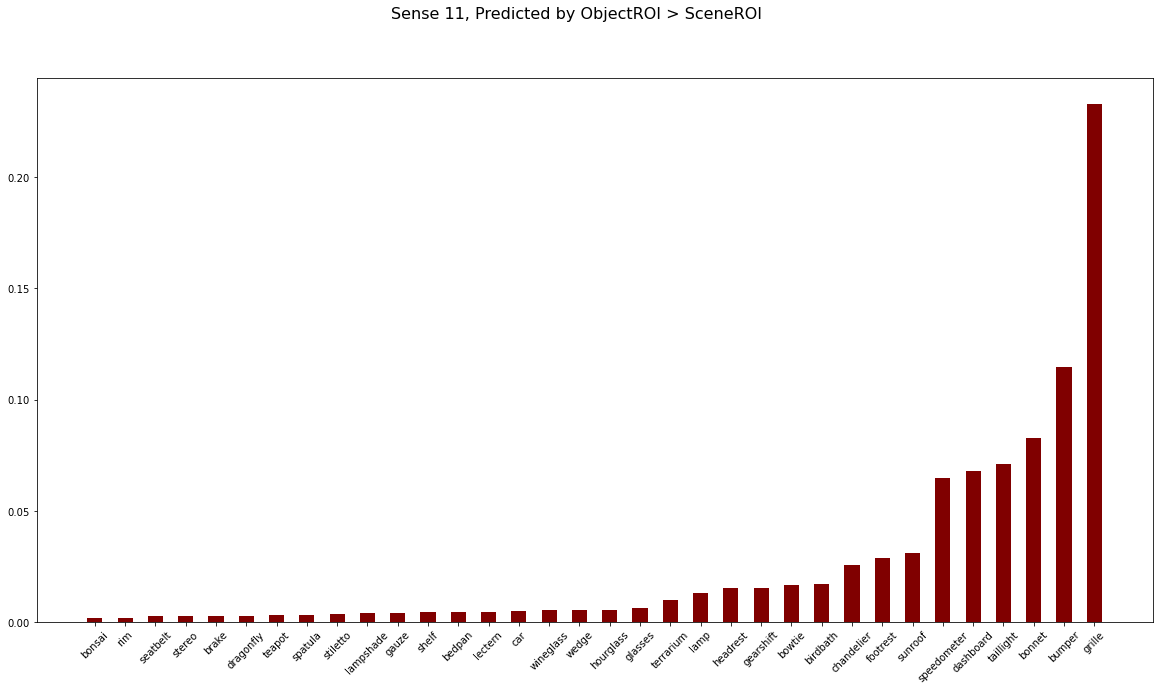

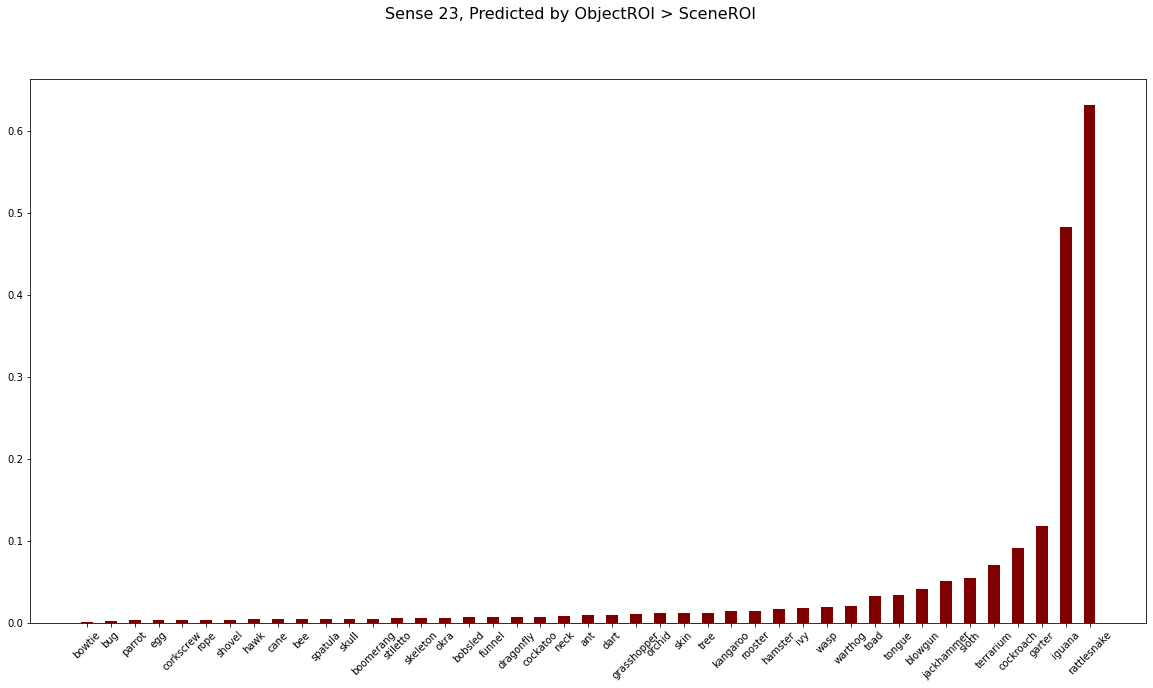

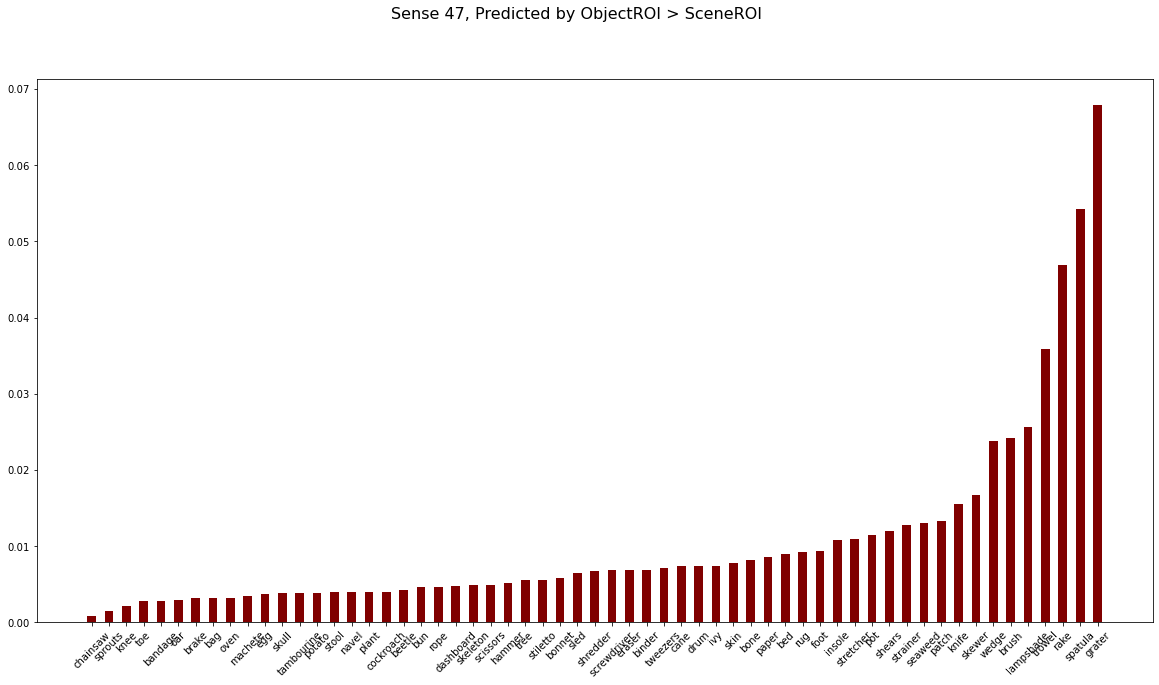

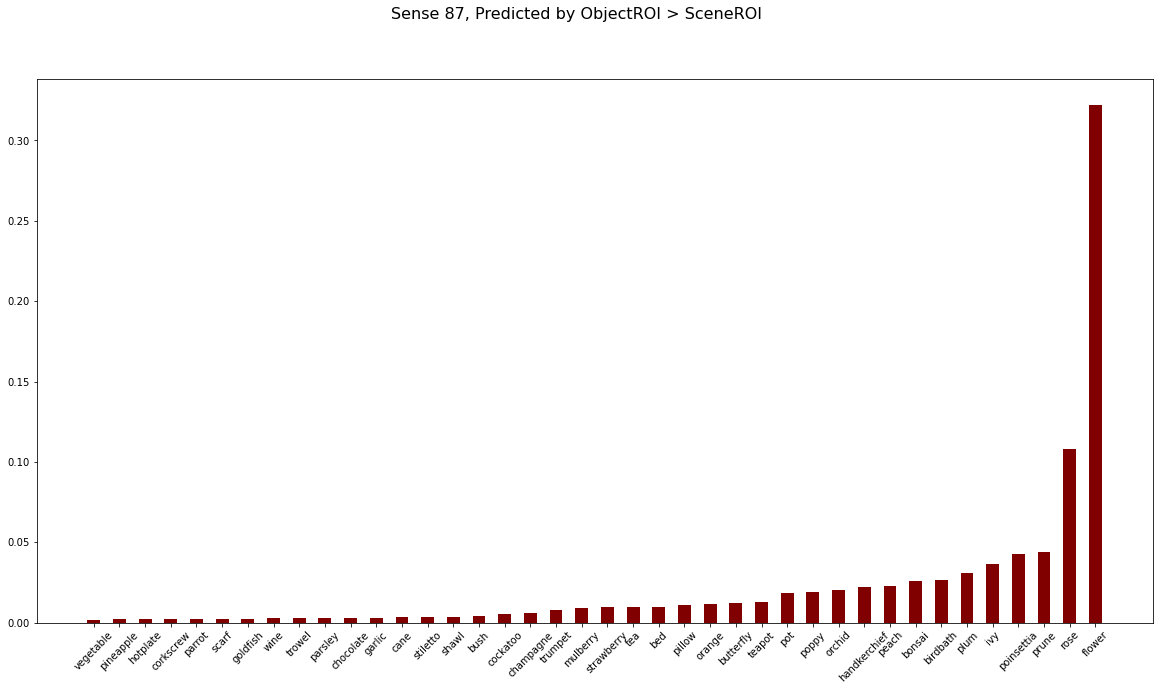

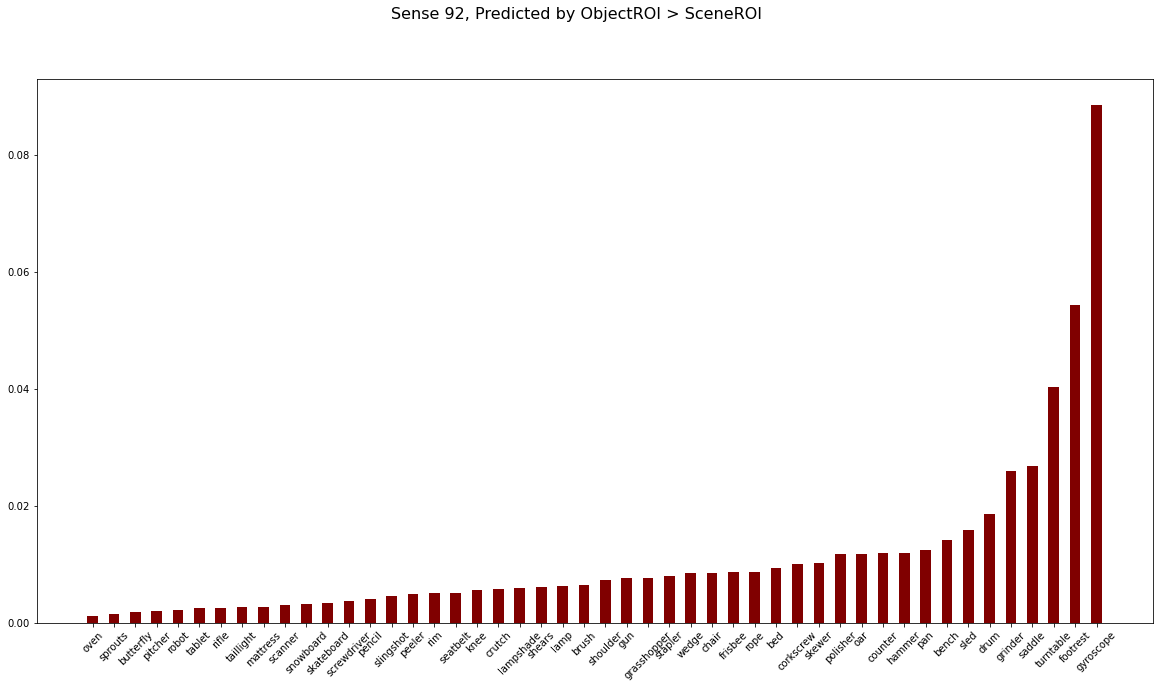

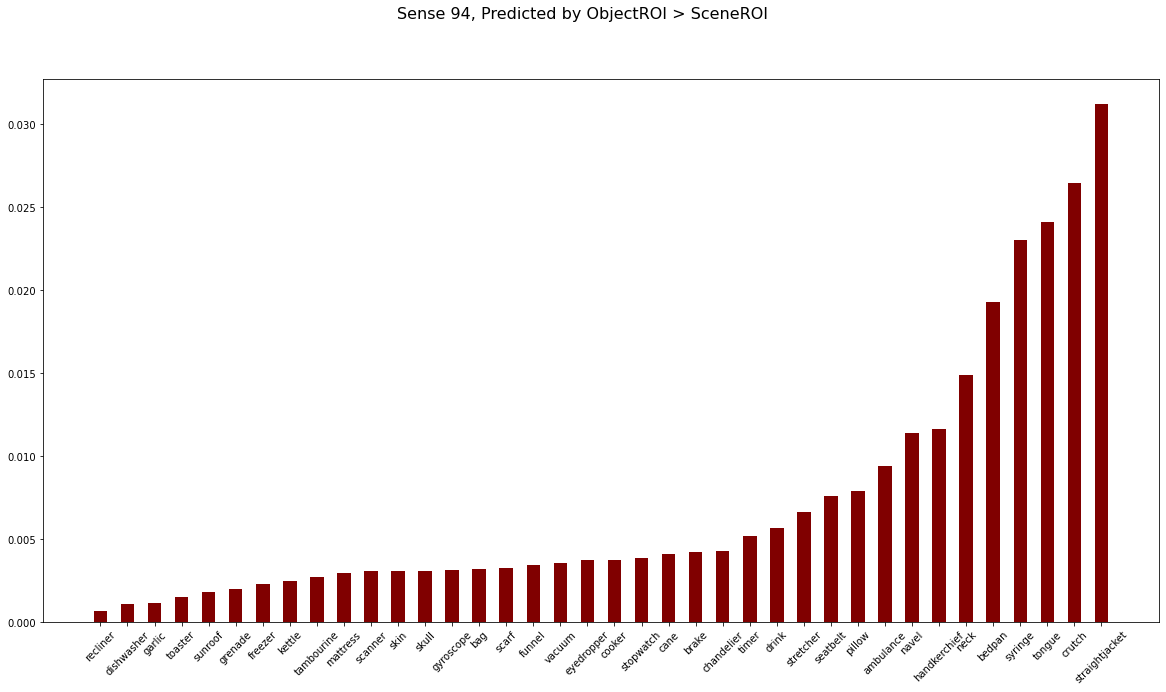

In [19]:
SaveFigPath = '../../../figures-17/'

for i in range(0,len(Diffsenses_Ob)-1):
    if Diffsenses_Ob[i]:
        thisSense = Y_embeddings_csv[Y_embeddings_csv.iloc[:,i]>0].iloc[:,i]
        X = np.arange(len(thisSense))
        fig = plt.figure(figsize = (20, 10)) 
        ax = fig.add_subplot(111)
        plt.xticks(rotation=45)
        # creating the bar plot 
        ax.bar(X, thisSense.sort_values(), color ='maroon', width = 0.5) 
        ax.set_xticks(X)
        ax.set_xticklabels(thisSense.sort_values().index)
        fig.suptitle('Sense ' + str(i) + ', Predicted by ObjectROI > SceneROI', fontsize=16)
        plt.savefig(SaveFigPath + 'Sense' + str(i) + '_ObjectROI' + '.png')

In [ ]:
for i in range(0,len(Diffsenses_Sc)-1):
    if Diffsenses_Sc[i]:
        thisSense = Y_embeddings_csv[Y_embeddings_csv.iloc[:,i]>0].iloc[:,i]
        X = np.arange(len(thisSense))
        fig = plt.figure(figsize = (20, 10)) 
        ax = fig.add_subplot(111)
        plt.xticks(rotation=45)
        # creating the bar plot 
        ax.bar(X, thisSense.sort_values(), color ='maroon', width = 0.5) 
        ax.set_xticks(X)

        ax.set_xticklabels(thisSense.sort_values().index)
        fig.suptitle('Sense ' + str(i) + ', Predicted by SceneROI > ObjectROI', fontsize=16)
        plt.savefig(SaveFigPath + 'Sense' + str(i) + '_SceneROI' + '.png')

# Look at Sense for all Word2Sense dataset

In [45]:
Word2SensePath = '../../../../Word2Sense/'
Word2Sense = pd.read_csv(Word2SensePath + "Word2Sense.txt",sep = ' ',index_col=0)
Word2Sense

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.2167,0.0.2168,0.0.2169,0.0.2170,0.0.2171,0.0.2172,0.0.2173,0.0.2174,0.00030068117997894995,Unnamed: 2251
!doctype,,,,,,,,,,,,,,,,,,,,,
#1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.007234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
#2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
#3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
#4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
#5,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.006562,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzap,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
zzg113,0.0,0.0,0.000000,0.0,0.027181,0.0,0.000000,0.0,0.0,0.001510,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
zzyzx,0.0,0.0,0.009328,0.0,0.000000,0.0,0.005888,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [73]:
#drop last column
Word2Sense = Word2Sense.iloc[:, :-1] 
#rename columns
ficts = {}
for i in range(0,Word2Sense.shape[1]):
    ficts[Word2Sense.columns[i]] = "sense%03d" % (i+1) 
Word2Sense = Word2Sense.rename(columns = ficts)

In [105]:
thiscolname = Y_embeddings_csv.iloc[:,Diffsenses_Ob].columns.tolist()[0]

In [106]:
Word2Sense[[thiscolname]]


,sense122
!doctype,
#1,0.00000
#2,0.00000
#3,0.00000
#4,0.00000
#5,0.00000
...,...
zzap,0.00000
zzg113,0.00000
zzyzx,0.00176


In [114]:
Word2Sense.sort_values(thiscolname)[[thiscolname]][-35:]

Index(['ten-pin', 'kurosaki', 'dollman', 'bespectacled', 'chuckie',
       'bikini-clad', 'koopa', 'skittle', 'pappy', 'rosalina', 'tenpin',
       'spanky', 'yeller', 'heavyset', 'guaraldi', 'digivice', 'nickname',
       'quiff', 'capp', 'alley', 'fibber', 'orihime', 'goopy', 'hitsugaya',
       'rukia', 'segar', 'renji', 'beano', 'aizen', 'jughead', 'li'l', 'oyl',
       'bluto', 'kuchiki', 'gnasher'],
      dtype='object', name='!doctype')

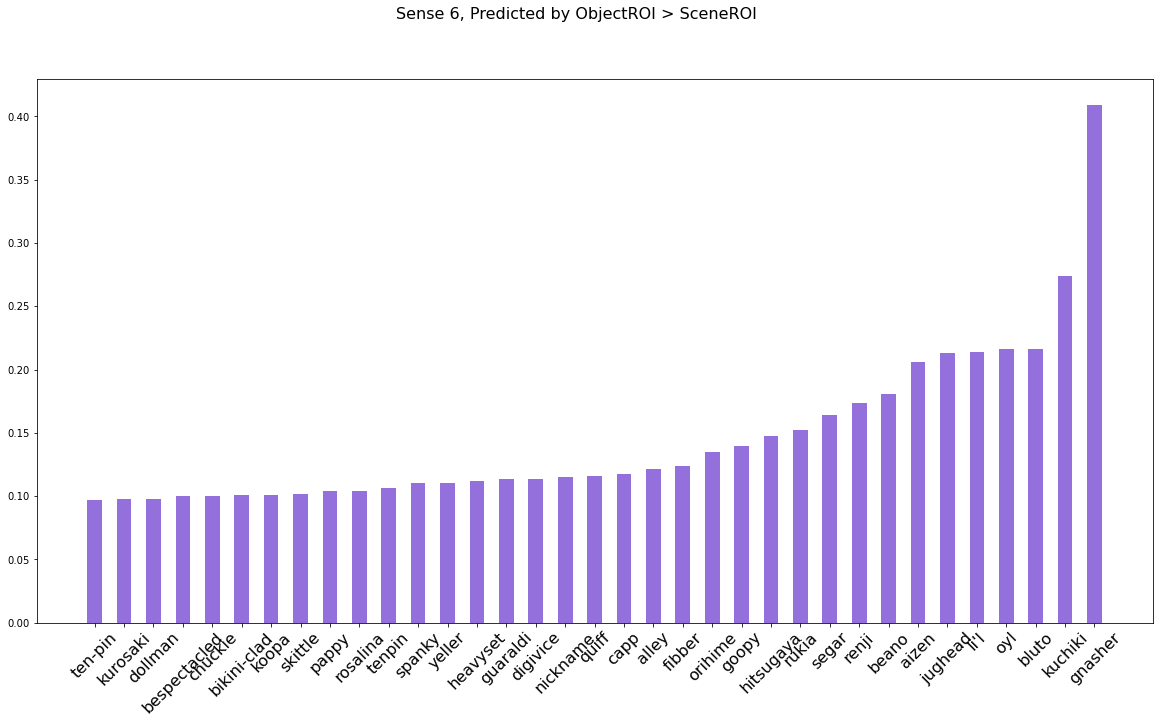

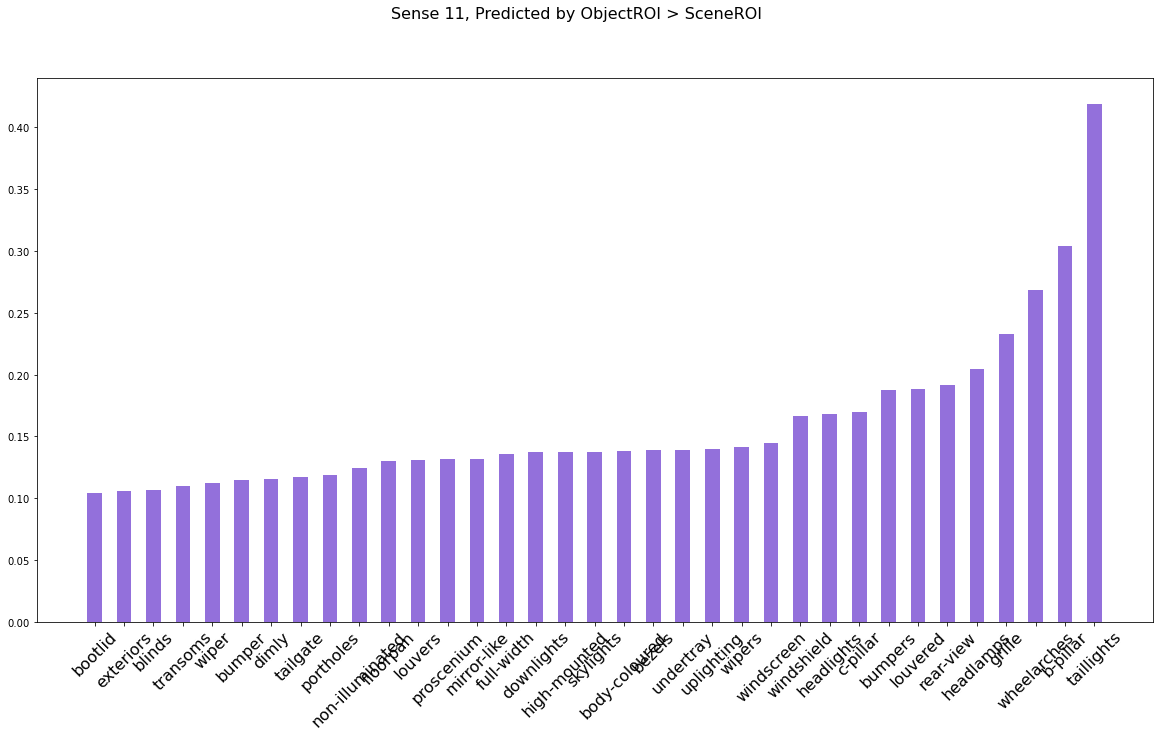

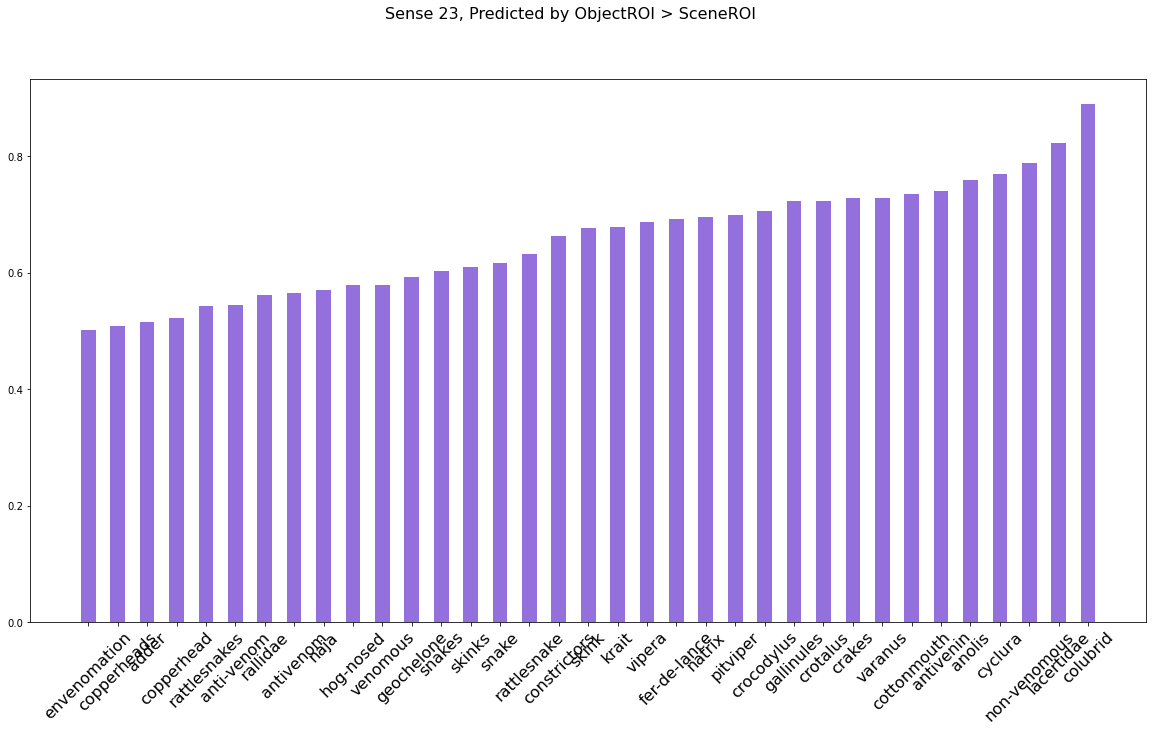

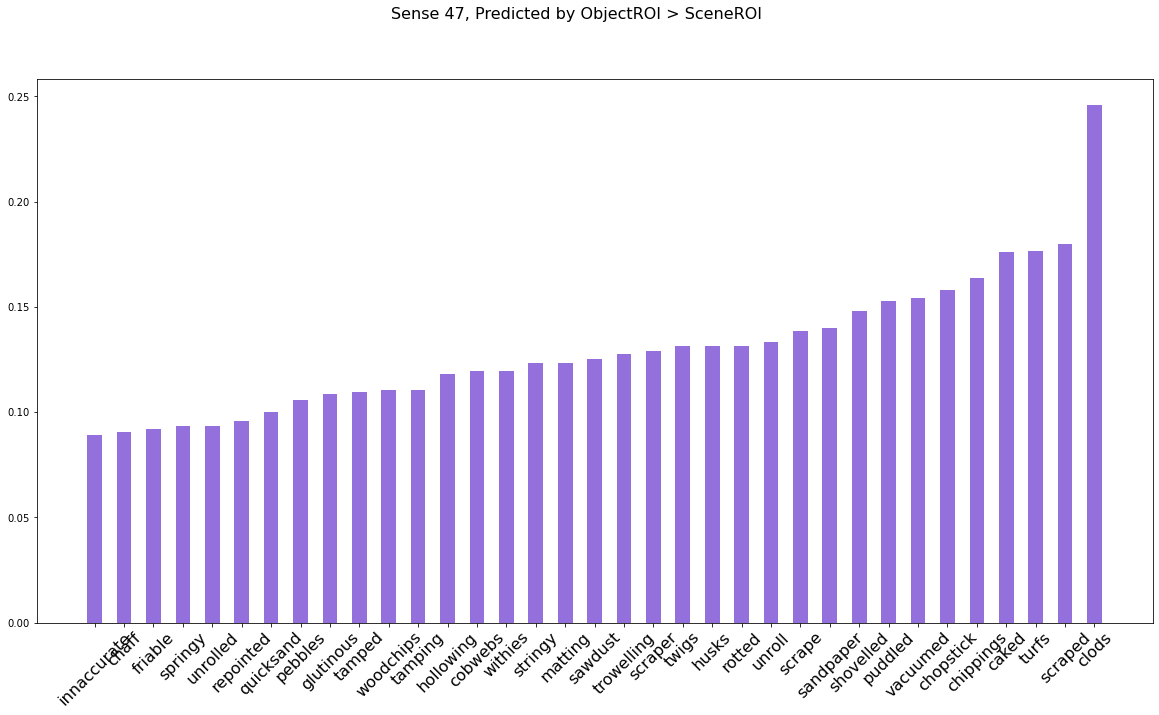

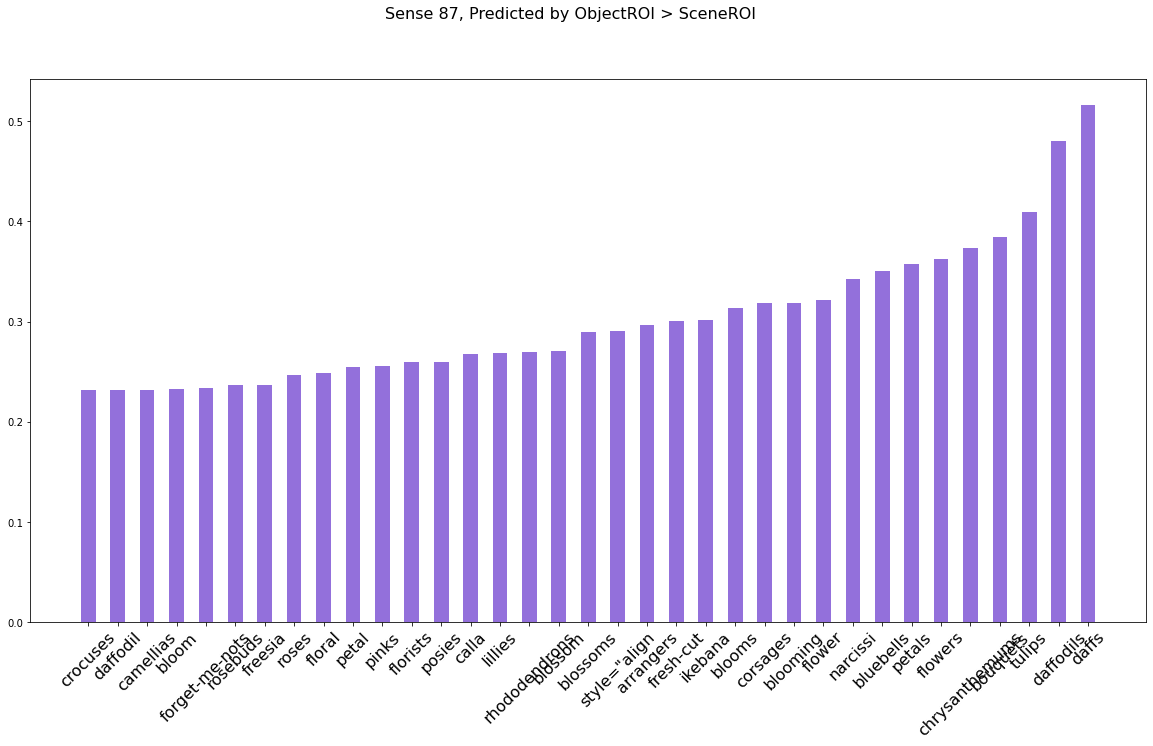

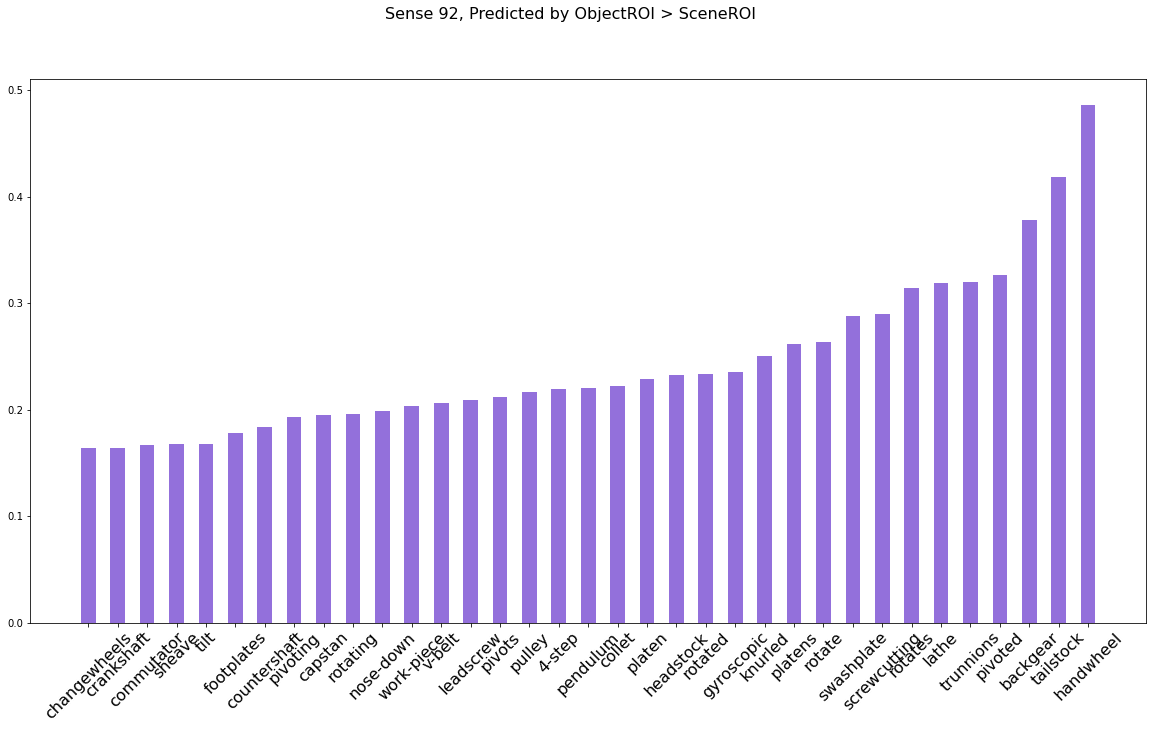

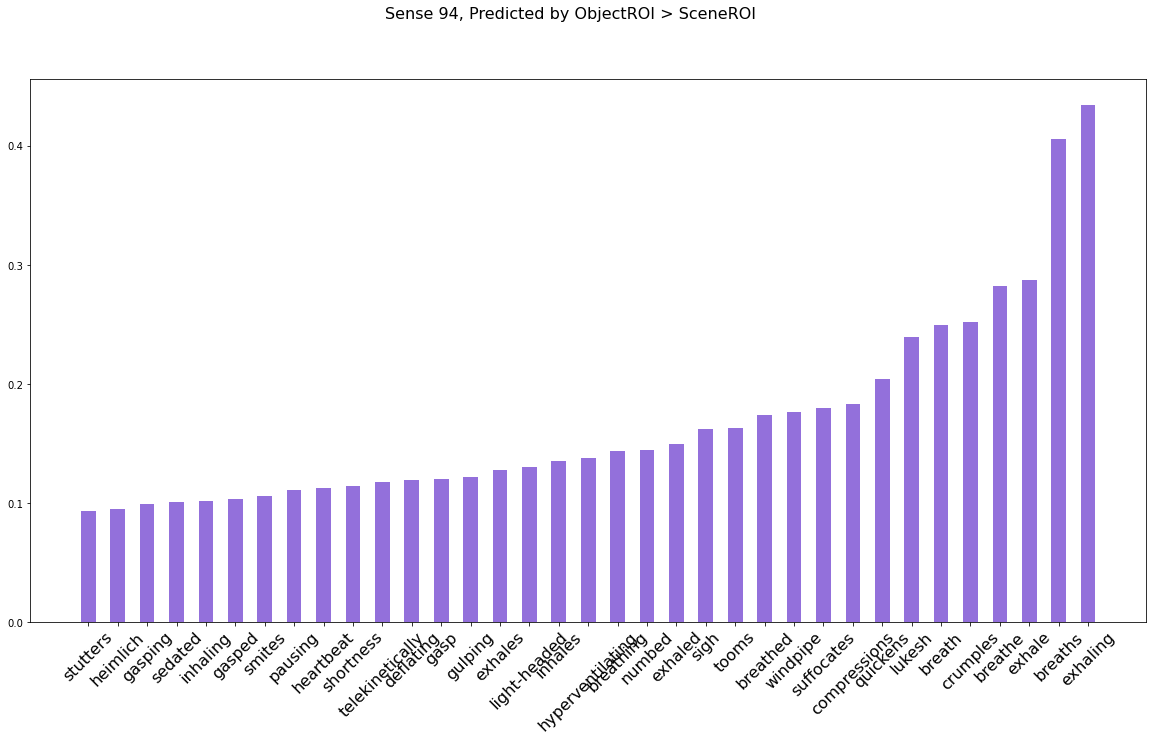

In [208]:
SaveFigPath = '../../../figures-17/'

for i in range(0,len(Diffsenses_Ob)-1):
    if Diffsenses_Ob[i]:
        thiscolname = Y_embeddings_csv.columns[i]
        thisSense = Word2Sense.sort_values(thiscolname)[[thiscolname]][-35:]
        
        #to make it plottable
        senselist = thisSense.values.tolist()
        flat_list = []
        for sublist in senselist:
            for item in sublist:
                flat_list.append(item)
                
        X = np.arange(len(flat_list))
        fig = plt.figure(figsize = (20, 10)) 
        ax = fig.add_subplot(111)
        plt.xticks(rotation=45)
        # creating the bar plot 
        ax.bar(X, flat_list, color ='mediumpurple', width = 0.5) 
        ax.set_xticks(X)
        ax.set_xticklabels(thisSense.index, fontsize=16)
        fig.suptitle('Sense ' + str(i) + ', Predicted by ObjectROI > SceneROI', fontsize=16)
        plt.savefig(SaveFigPath + 'Sense' + str(i) + '_ObjectROI' + '_allsenses.png')

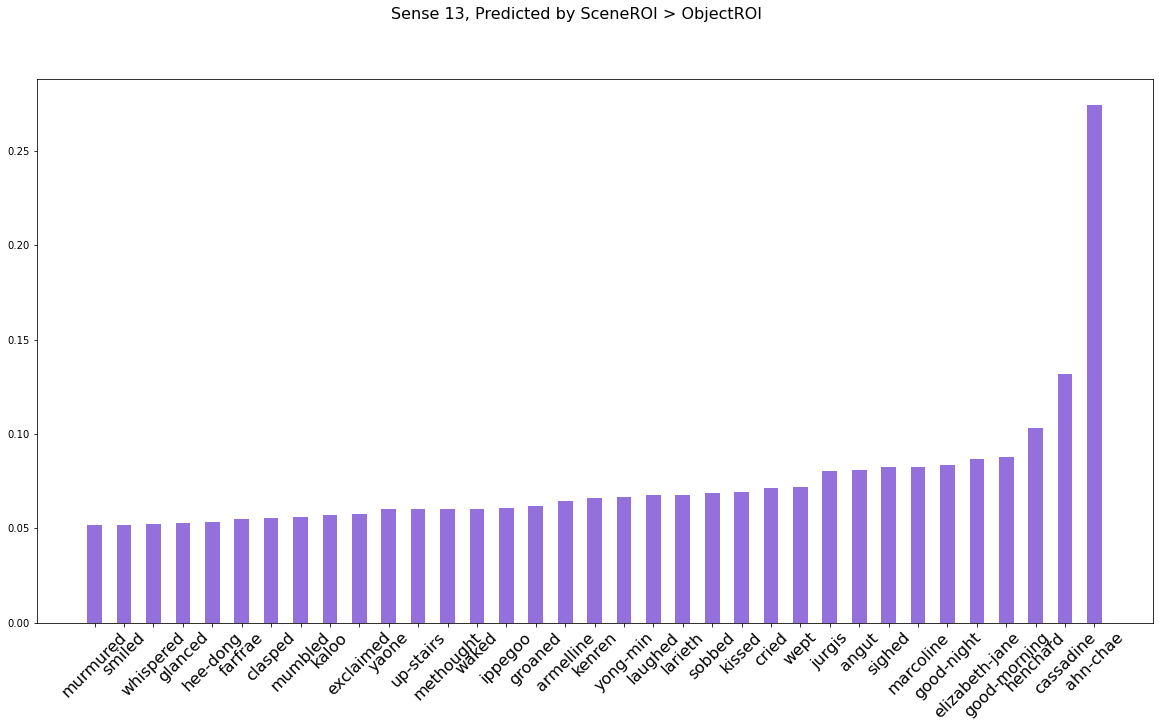

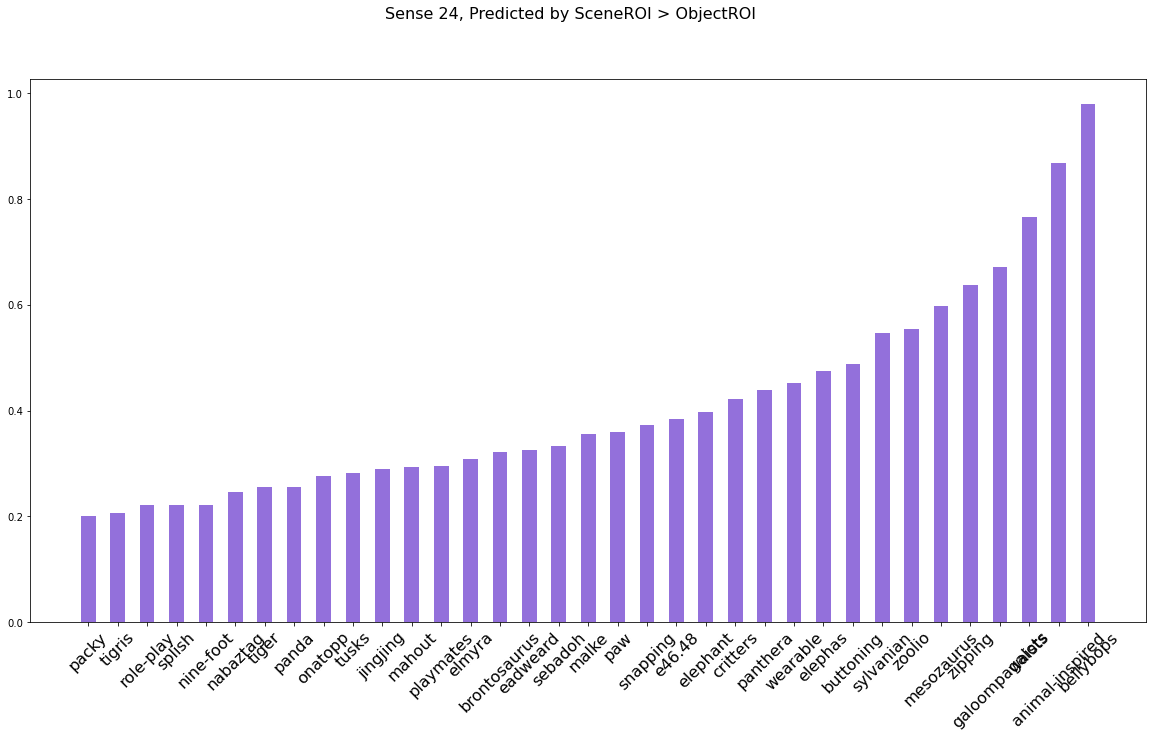

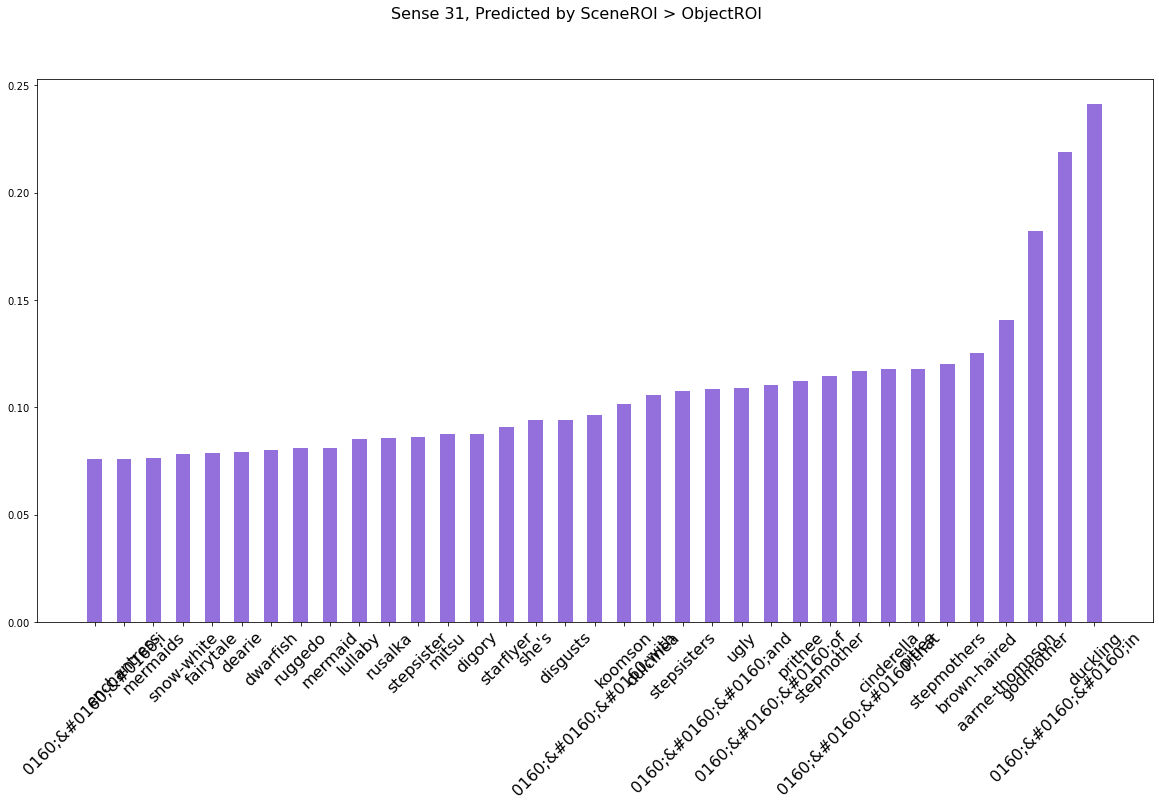

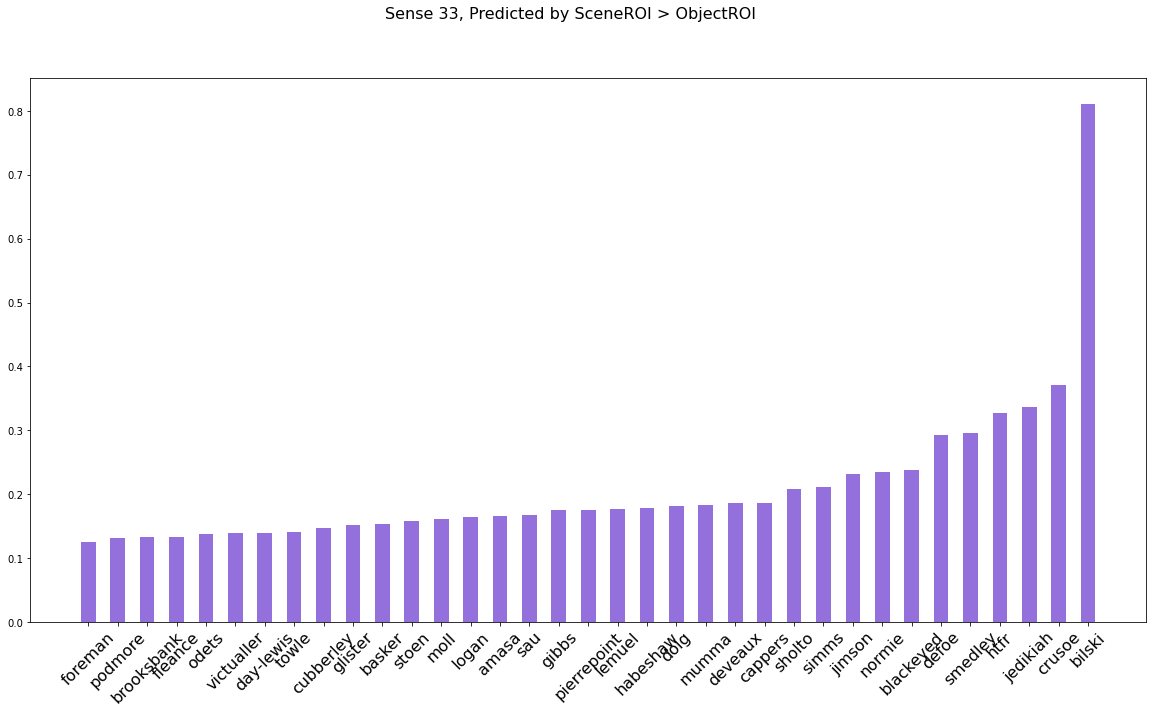

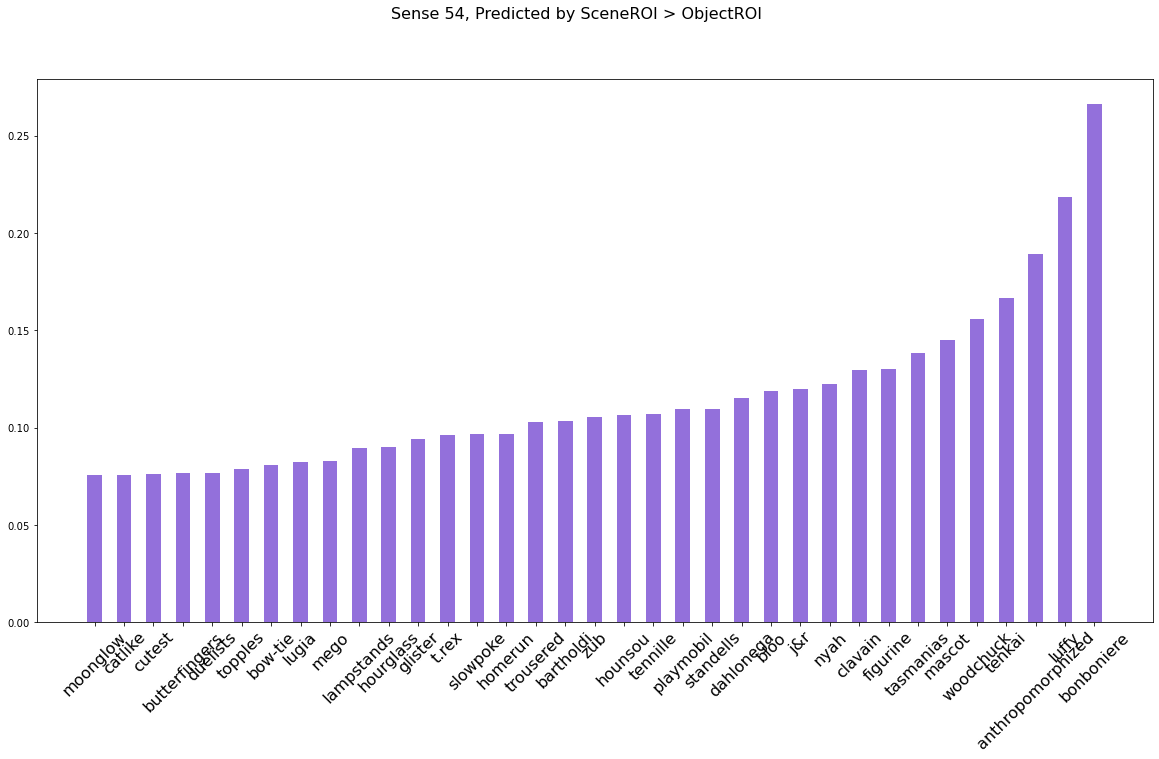

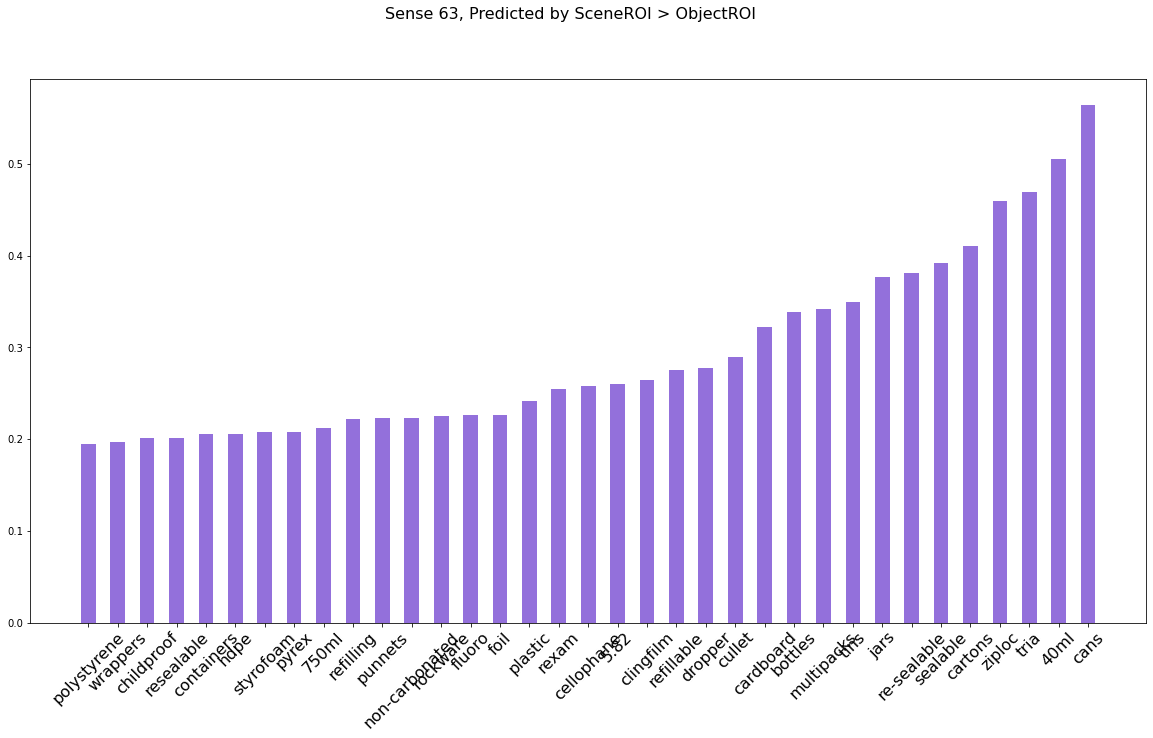

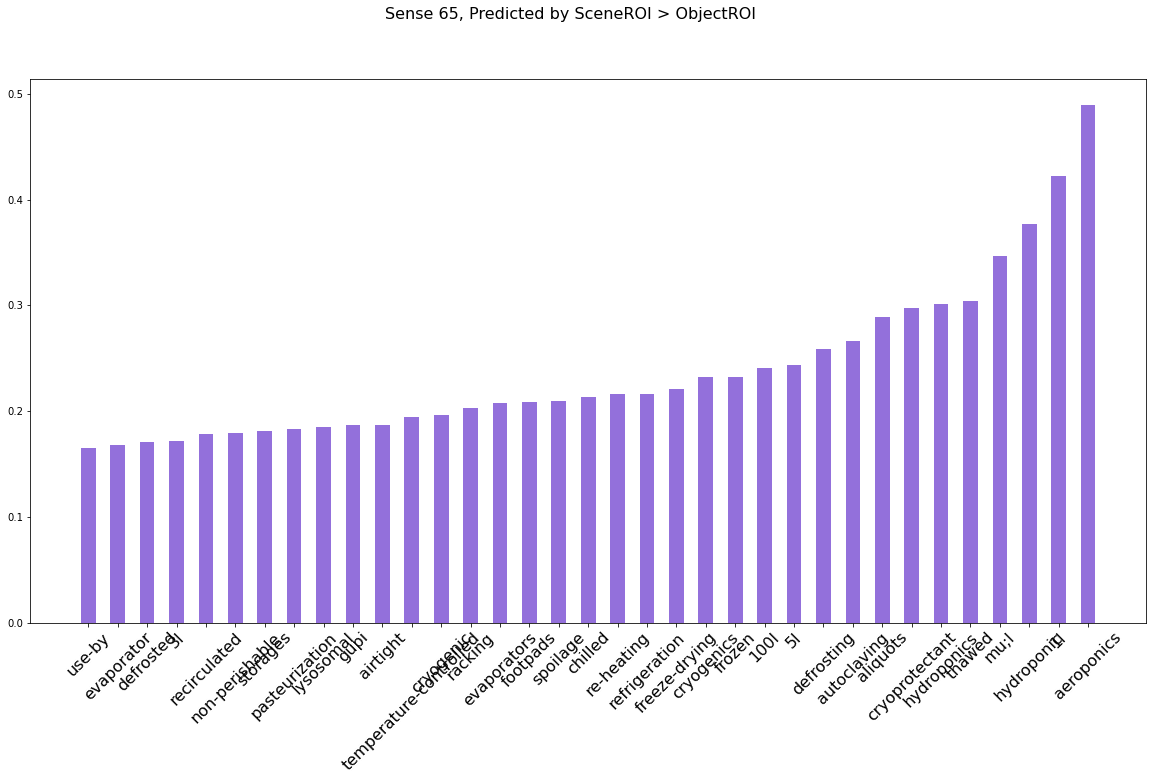

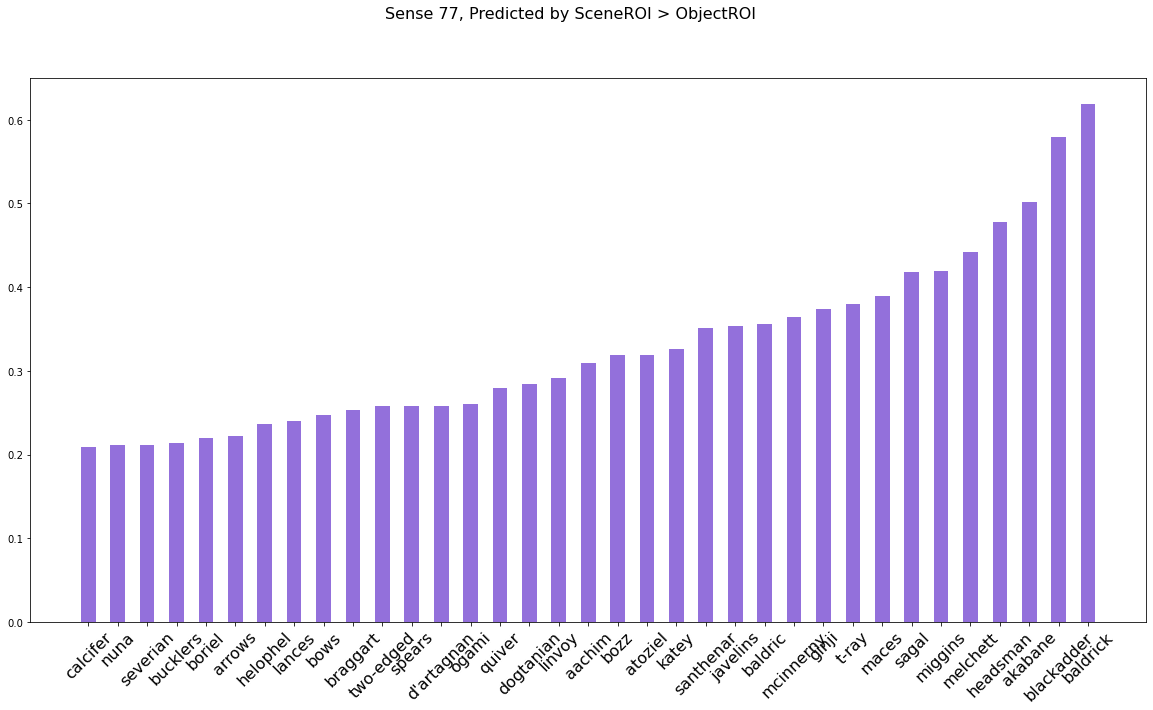

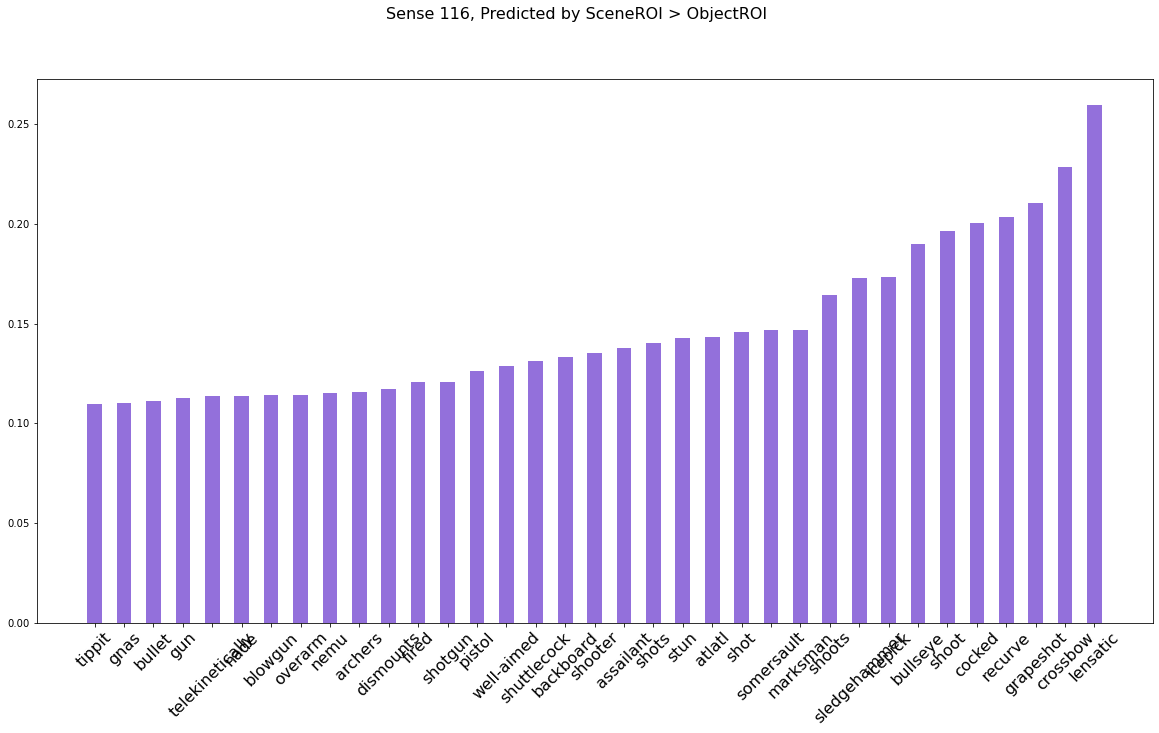

In [209]:
SaveFigPath = '../../../figures-17/'

for i in range(0,len(Diffsenses_Sc)-1):
    if Diffsenses_Sc[i]:
        thiscolname = Y_embeddings_csv.columns[i]
        thisSense = Word2Sense.sort_values(thiscolname)[[thiscolname]][-35:]
        
        #to make it plottable
        senselist = thisSense.values.tolist()
        flat_list = []
        for sublist in senselist:
            for item in sublist:
                flat_list.append(item)
                
        X = np.arange(len(flat_list))
        fig = plt.figure(figsize = (20, 10)) 
        ax = fig.add_subplot(111)
        plt.xticks(rotation=45)
        # creating the bar plot 
        ax.bar(X, flat_list, color ='mediumpurple', width = 0.5) 
        ax.set_xticks(X)
        ax.set_xticklabels(thisSense.index, fontsize=16)
        fig.suptitle('Sense ' + str(i) + ', Predicted by SceneROI > ObjectROI', fontsize=16)
        plt.savefig(SaveFigPath + 'Sense' + str(i) + '_SceneROI' + '_allsenses.png')

In [196]:
Y_embeddings_csv.iloc[:,11].columns

AttributeError: 'Series' object has no attribute 'columns'

In [199]:
Y

'sense143'

In [177]:
senselist = thisSense.values.tolist()

Word
ambulance    0.000000
ant          0.000000
bag          0.000000
bandage      0.000000
bassoon      0.000000
               ...   
weasel       0.000000
wedge        0.005258
wine         0.000000
wineglass    0.005248
yak          0.000000
Name: sense143, Length: 312, dtype: float64

In [178]:
flat_list = []
for sublist in senselist:
    for item in sublist:
        flat_list.append(item)

In [180]:
ax.bar(X,  flat_list, color ='maroon', width = 0.5) 

<BarContainer object of 35 artists>